## Metagenomics Analysis

In [1]:
from onecodex import Api

ocx = Api()

In [40]:
#project = ocx.Projects.where(name="Aging_vyom")
project = ocx.Projects.where(name="p16_vyom")

In [42]:
# This returns nothing because by default we search our *own* samples only
ocx.Samples.where(project=project)  

[<Samples db4fe31195e447a1: "FF05294400.fastq.gz">, <Samples f5e2d47ea0f24cad: "FF05623493.fastq.gz">, <Samples 25c57aaa1b644759: "FF05294118.fastq.gz">, <Samples 552037ac34e04ee0: "FF05623881.fastq.gz">, <Samples 8e4b439499104764: "FF05623901.fastq.gz">, <Samples 1f589a2409ec4acc: "FF05294245.fastq.gz">, <Samples 9985a60b26a74c69: "FF05294134.fastq.gz">, <Samples 379b470f57444521: "FF05294528.fastq.gz">, <Samples 2080ad39f6704318: "FF05294431.fastq.gz">, <Samples f69baa4d3a5a44ab: "FF05294298.fastq.gz">, <Samples 5f3580bb22d54ee2: "FF05294359.fastq.gz">]

In [43]:
# So, we need to pass the `public=True` flag to ocx.Samples.where() in order to 
# search all public samples. Here, we limit this to return 50 samples. By default,
# queries return all private samples or up to 1000 public samples. Pass `limit=n`
# to retrieve up to `n` available public samples.
samples = ocx.Samples.where(project=project)  

In [44]:
len(samples)

11

#### Now, let's look at some of the samples associated with this study.
_Note: These samples have a *lot* of custom metadata. You can add custom metadata to your samples on our website, by uploading an Excel sample sheet, or via our API. For more details, see our documentation on metadata: [https://docs.onecodex.com/docs/metadata](https://docs.onecodex.com/docs/metadata)._

In [45]:
samples[0].metadata

<Metadata f5b79cff85294bf9>

## Beta diversity statistics


In [47]:
distance_matrix = samples.unifrac()

In [49]:
# Printing shows the distance matrix. Here, the labels are classification IDs.
distance_matrix.to_data_frame()

,d255ec93206e4c77,19a543aa261c44bb,512a21fbf7c94efb,286de08912b54161,83ec918f00b346ce,2f0143f00ce84a63,fefc62d667cc4c79,602827720cad4d22,c0b17e235ede4a82,ee3eee2235314b73,8623afba1f62499b
d255ec93206e4c77,0.000000,0.112756,0.088734,0.125120,0.118635,0.113237,0.141586,0.108894,0.068613,0.065560,0.141027
19a543aa261c44bb,0.112756,0.000000,0.129476,0.139015,0.071908,0.076339,0.190970,0.074016,0.084045,0.134008,0.189674
512a21fbf7c94efb,0.088734,0.129476,0.000000,0.120195,0.167451,0.137825,0.123810,0.146683,0.080530,0.103265,0.076549
286de08912b54161,0.125120,0.139015,0.120195,0.000000,0.134918,0.122677,0.190677,0.130577,0.139662,0.172374,0.166691
83ec918f00b346ce,0.118635,0.071908,0.167451,0.134918,0.000000,0.081111,0.228582,0.069659,0.107895,0.140647,0.219815
2f0143f00ce84a63,0.113237,0.076339,0.137825,0.122677,0.081111,0.000000,0.197376,0.088956,0.090364,0.118006,0.194536
fefc62d667cc4c79,0.141586,0.190970,0.123810,0.190677,0.228582,0.197376,0.000000,0.193105,0.135478,0.148767,0.117567
602827720cad4d22,0.108894,0.074016,0.146683,0.130577,0.069659,0.088956,0.193105,0.000000,0.093887,0.122177,0.199325
c0b17e235ede4a82,0.068613,0.084045,0.080530,0.139662,0.107895,0.090364,0.135478,0.093887,0.000000,0.072537,0.136191
ee3eee2235314b73,0.065560,0.134008,0.103265,0.172374,0.140647,0.118006,0.148767,0.122177,0.072537,0.000000,0.158784


In [ ]:
samples[:20].plot_distance(title='Unifrac Distance Matrix', metric='braycurtis')

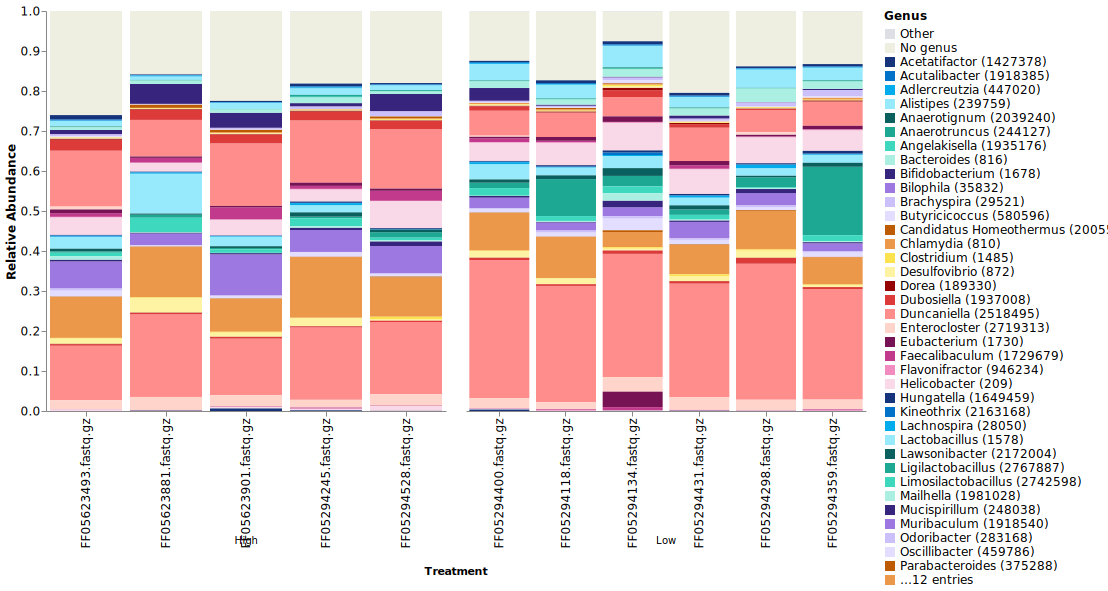

In [ ]:
samples.plot_bargraph(
    rank='genus', legend='Genus', ylabel='Relative Abundance', top_n=50, haxis='Treatment'
)

## Export matrix

In [52]:
matrix = samples.beta_diversity( rank = 'species',metric='braycurtis')

In [53]:
matrix1 = matrix.to_data_frame()


In [54]:
# Import a function that will allow you to view a link to download your files
from IPython.display import FileLink

# Write your pandas dataframe to a csv
matrix1.to_csv("Aging_microbiome_beta_diversity_p16.csv", index=False, sep=',')

# Display a link to download that file to your machine
FileLink("Aging_microbiome_beta_diversity_p16.csv")

/work/Aging_microbiome_beta_diversity_p16.csv